In [11]:
#%matplotlib widget 
import sys
sys.path.append('/sdf/group/ad/beamphysics/jytang/pyDFCSR/')
from pyDFCSR_2D import pyDFCSR_mpi_run
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

In [12]:
print(sys.path) 

['/sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/', '/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/lib/python38.zip', '/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/lib/python3.8', '/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/lib/python3.8/lib-dynload', '', '/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/lib/python3.8/site-packages', '/sdf/group/ad/beamphysics/jytang/pyDFCSR/', '/sdf/group/ad/beamphysics/jytang/pyDFCSR/']


## Run DFCSR

In [2]:
testCSR = CSR2D(input_file= 'input/chicane_config.yaml')

In [ ]:
testCSR.run()

Calculating CSR at s= 0.1


## Parallel Run with MPI

In [5]:
import pyDFCSR_mpi_run

In [15]:
# input yaml file in "./input/dipole_config.yaml"
#salloc --partition milano --account ad:beamphysics -N 1 -n 10 /usr/lib64/openmpi/bin/mpirun python  -m pyDFCSR_mpi_run ./input/dipole_config.yaml
!mpirun -n 4 python  -m pyDFCSR_mpi_run.py ./input/chicane_config.yaml

/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/bin/python: Error while finding module specification for 'pyDFCSR_mpi_run.py' (ModuleNotFoundError: No module named 'pyDFCSR_mpi_run')
/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/bin/python: Error while finding module specification for 'pyDFCSR_mpi_run.py' (ModuleNotFoundError: No module named 'pyDFCSR_mpi_run')
/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/bin/python: Error while finding module specification for 'pyDFCSR_mpi_run.py' (ModuleNotFoundError: No module named 'pyDFCSR_mpi_run')
/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/bin/python: Error while finding module specification for 'pyDFCSR_mpi_run.py' (ModuleNotFoundError: No module named 'pyDFCSR_mpi_run')


## Plot output

In [4]:
from plot_from_output import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'chicane-2024-05-27T21_11_41-07_00',
                             work_dir = './output')

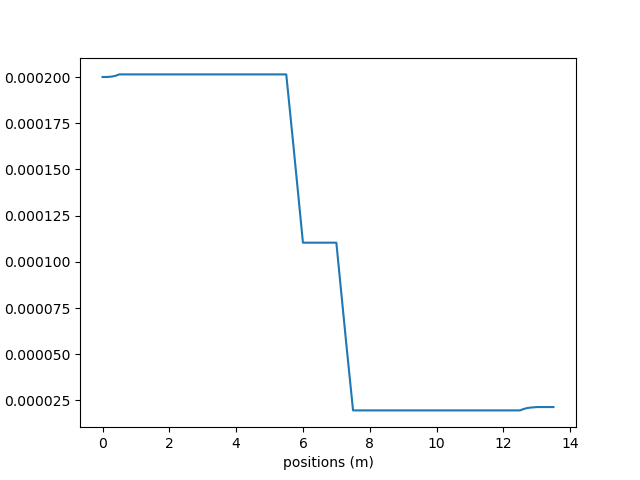

In [5]:
# Plot beam size along the lattice
DFplot.plot_stats(key = 'sigZ')

plot longitudinal wakes at nearest point s  = 5.799999999999995 m, step count 58
ebeam energy 5000000026.255665


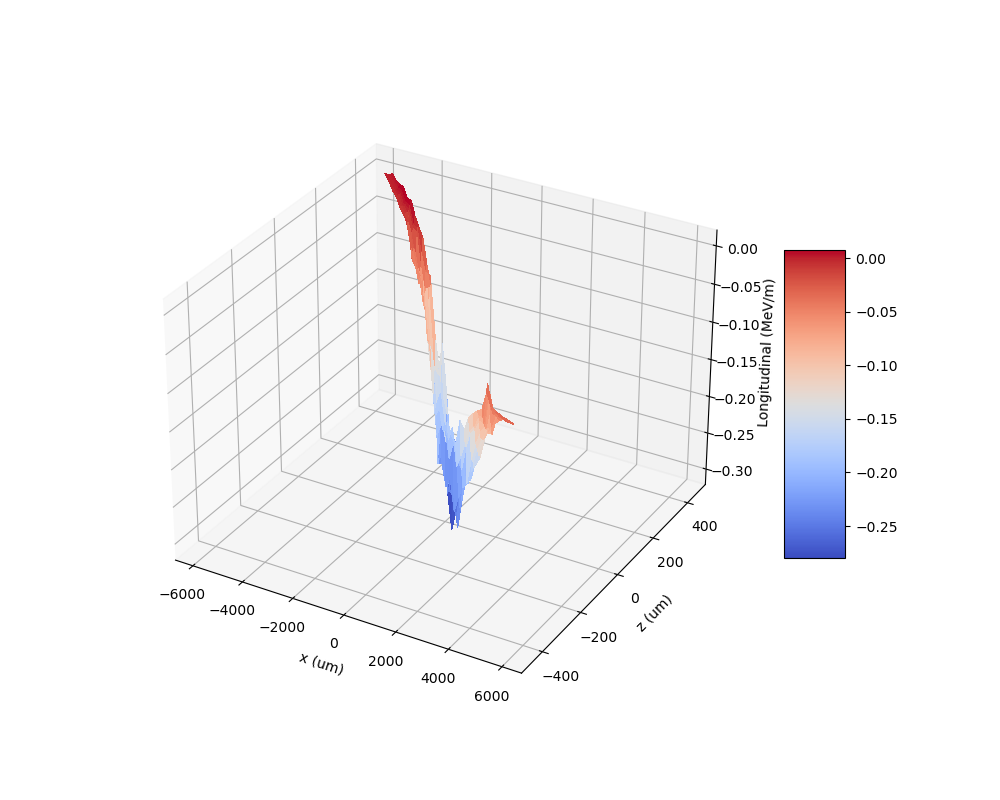

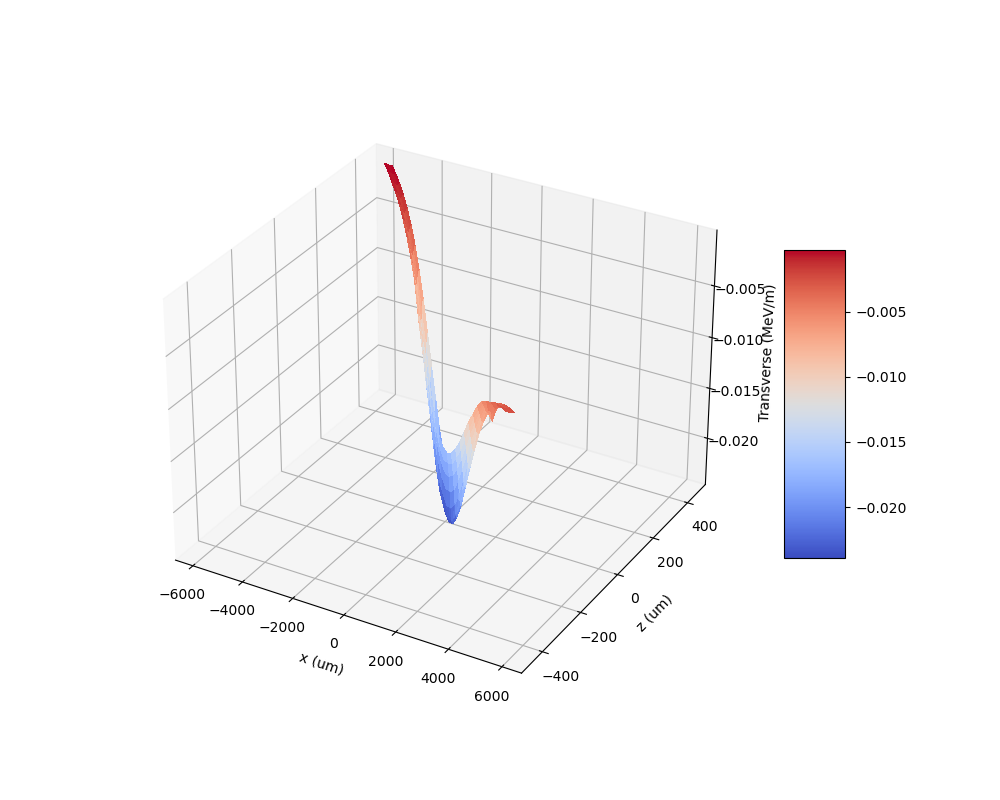

In [12]:
DFplot.plot_wakes(s = 5.75)

plot longitudinal wakes at nearest point s  = 0.6 m, step count 6


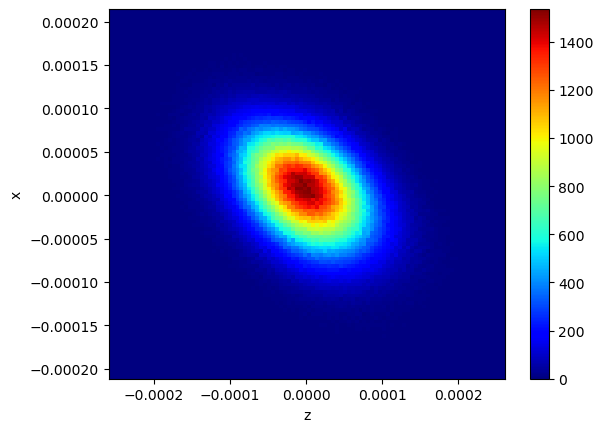

In [36]:
DFplot.plot_particles(s = 0.6, xkey = 'z', ykey = 'x')

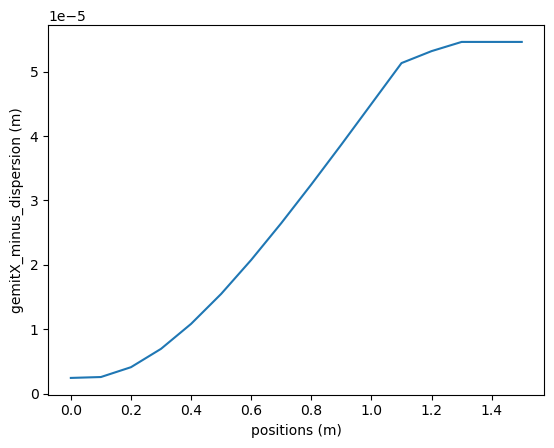

In [37]:
DFplot.plot_stats(key = 'gemitX_minus_dispersion')